# Comparative Analysis of Machine Learning Models for Temperature Prediction in London: Optimization and Performance Evaluation

## Introduction

Weather prediction plays a pivotal role in our daily lives. It influences a wide range of activities from planning outdoor events to making informed decisions about energy consumption. Accurate temperature forecasting, in particular, is a fundamental component of weather prediction, with implications for agriculture, energy management, and public safety.

In this study, we explore machine-learning models and use them to predict temperature in the dynamic climate of London. London, known for its dreary and unpredictable weather patterns, provides a challenging yet intriguing environment for testing and fine-tuning predictive models. The city's climate is influenced by a variety of meteorological factors, including cloud cover, sunshine, precipitation, pressure, and global radiation. Utilizing these weather features, we aim to determine which machine learning models offer the most precise and reliable temperature predictions for London. Our study encompasses a broad spectrum of machine learning algorithms, including regression, random forests, and feed-forward neural networks. These models, each with its unique strengths and characteristics, will be put to the test in an effort to identify the best-performing solution.

We recognize the importance of hyperparameter optimization in fine-tuning model performance. As such, we employ Bayesian optimization techniques to seek optimal hyperparameters for our most promising model: the feed-forward neural network. This approach not only enhances the accuracy of our predictions; it also demonstrates the value of optimization in the context of weather forecasting. Through experimentation and evaluation, we seek to answer several research questions: Which machine learning model is the most adept at capturing the nuances of London's climate? How significant is the impact of hyperparameter optimization on model performance? What insights can we gain to improve temperature prediction accuracy in real-world scenarios?

This study is structured to provide a rudimentary analysis of the various models employed, the optimization techniques applied, and their respective performances. By the end of this investigation, we aim to offer valuable insights into temperature prediction methodologies and contribute to the broader field of weather forecasting.

## Methodology

We first include the necessary installation packages, import the libraries and modules, and upload the dataset.

### Install Packages

In [15]:
pip install mlflow

In [16]:
!pip install scikit-optimize


### Libraries and Modules

In this project, a range of libraries were strategically chosen to streamline various aspects of data analysis and machine learning. For data preprocessing, numpy and pandas facilitated numerical operations and data manipulation, respectively. The scikit-learn library played a multifaceted role: its train_test_split and cross_val_score modules managed data partitioning and model validation, the SimpleImputer addressed missing values, and StandardScaler ensured feature scaling, a prerequisite for many algorithms. The modeling phase was equally diverse, with scikit-learn providing tools for linear models like LinearRegression, Ridge, and Lasso, as well as more complex models like DecisionTreeRegressor, RandomForestRegressor, and MLPRegressor. The inclusion of XGBRegressor from the xgboost library underscored the project's commitment to leveraging gradient-boosted trees, renowned for their efficacy in regression tasks. Hyperparameter tuning was elevated with skopt's gp_minimize, a Bayesian optimization tool, and its accompanying hyperparameter space definitions. Visualization was handled by the potent duo of matplotlib and seaborn, ensuring insightful and aesthetic data plots. Lastly, the project's experimental rigor was maintained using mlflow, ensuring systematic tracking and management of various model runs.


In [17]:
# Data Preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Model Evaluation and Metrics
from sklearn.metrics import mean_squared_error

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Hyperparameter Tuning
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Flow
import mlflow


### Upload Dataset

In [18]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving london_weather.csv to london_weather (1).csv
User uploaded file "london_weather (1).csv" with length 814426 bytes


In [19]:
# Import the data
weather = pd.read_csv('london_weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Exploratory Data Analysis


To facilitate EDA, we present a pairplot visualization:


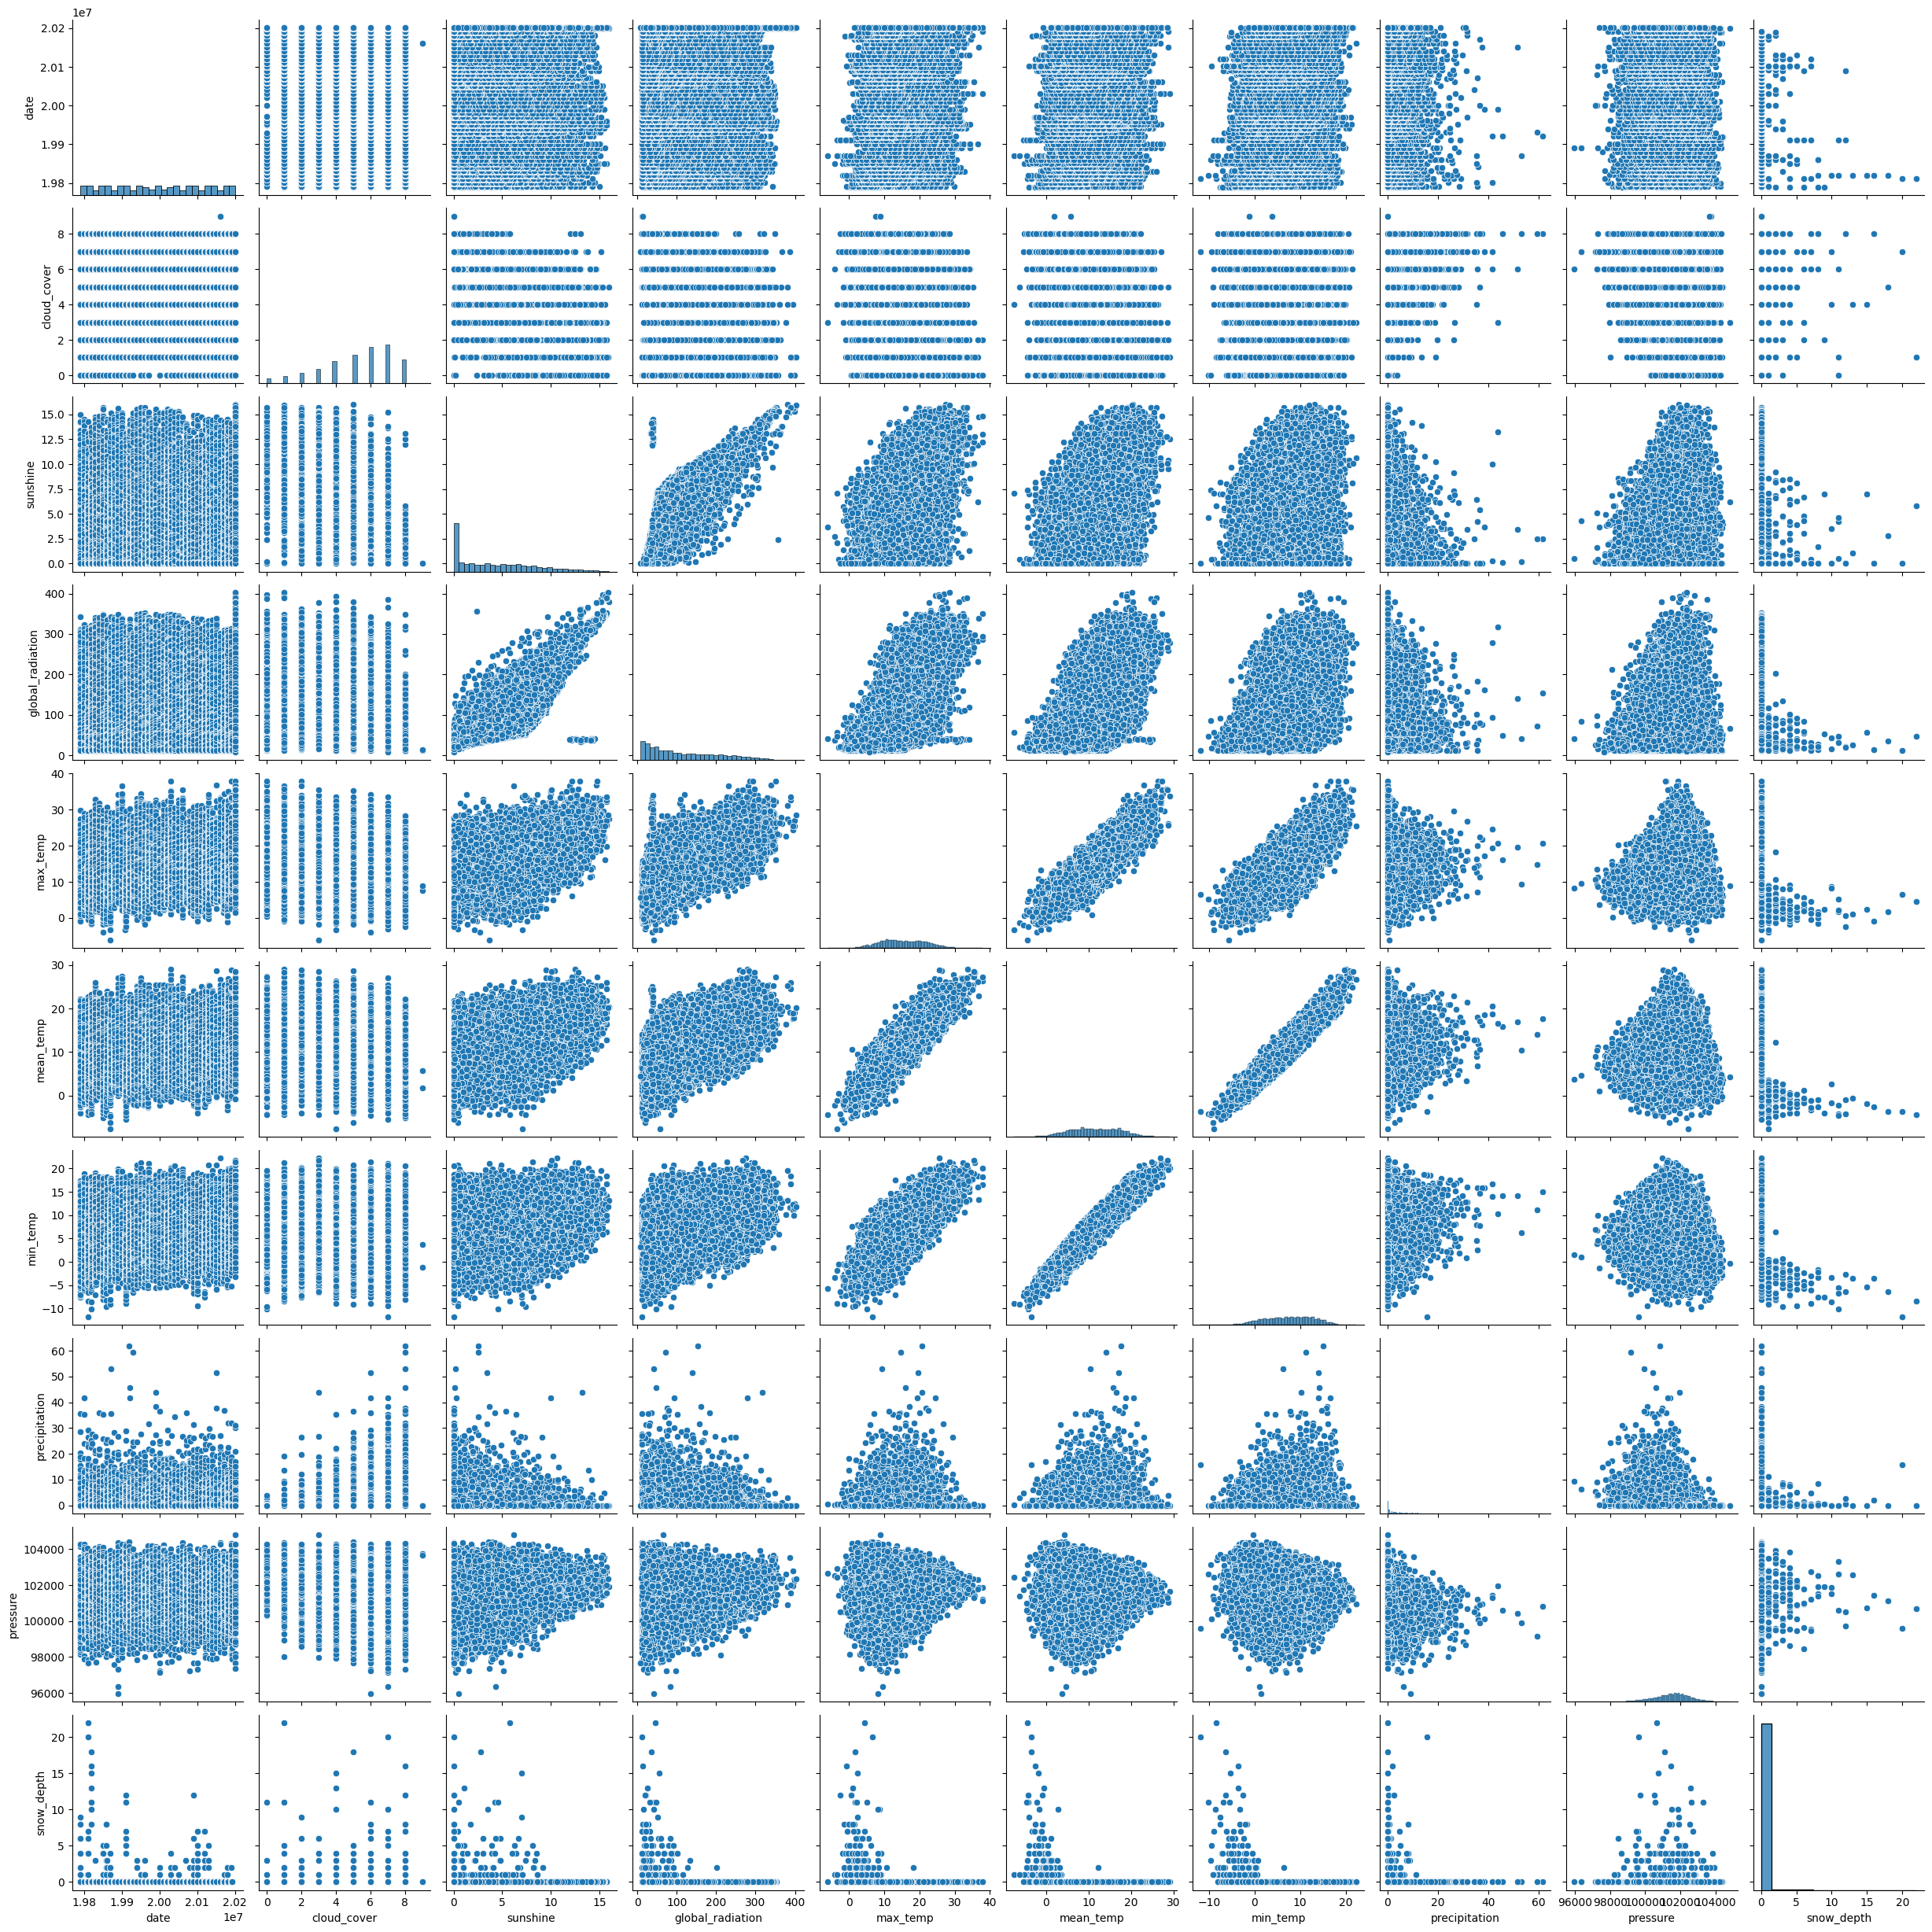

In [20]:
sns.pairplot(weather)
plt.show()

<ipython-input-21-cdbb44be94da>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)


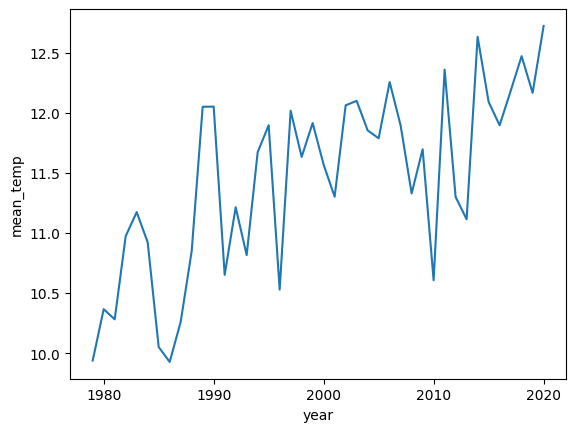

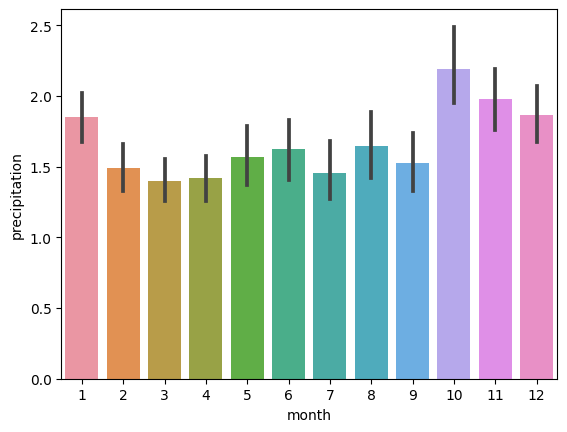

<ipython-input-21-cdbb44be94da>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(weather.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)


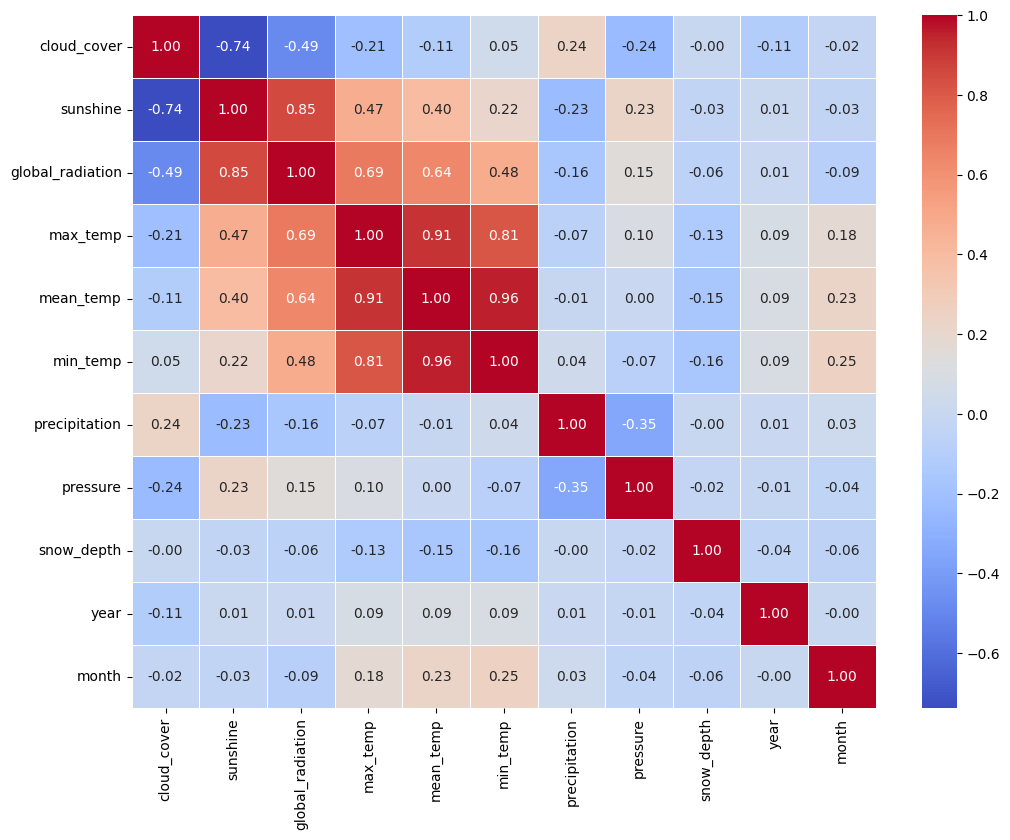

In [21]:
# Convert the 'date' column to a datetime format with the specified format '%Y%m%d'
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')

# Extract the year from the 'date' column and create a new 'year' column
weather['year'] = weather['date'].dt.year

# Extract the month from the 'date' column and create a new 'month' column
weather['month'] = weather['date'].dt.month

# List of weather metrics we're interested in
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

# Group the weather data by year and month, then calculate the mean for each weather metric
weather_per_month = weather.groupby(['year', 'month'], as_index = False)[weather_metrics].mean()

# Plot the yearly trend of mean temperature using a line plot
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)
plt.show()

# Plot the monthly precipitation data using a bar plot
sns.barplot(x='month', y='precipitation', data=weather)
plt.show()

# Display a heatmap to show the correlation between different weather metrics
plt.figure(figsize=(12, 9))  # Use a larger figure size for better clarity
heatmap = sns.heatmap(weather.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Adjust the font size and possibly rotate the y-axis labels for better clarity
heatmap.tick_params(labelsize=10)
plt.yticks(rotation=0)
plt.show()



## Preprocessing Functions


In [22]:
# Preprocessing
feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target_var = 'mean_temp'
weather = weather.dropna(subset=['mean_temp'])

def preprocess_df(df, feature_selection, target_var):
    """
    Preprocess the provided DataFrame by selecting features, splitting the data, imputing missing values,
    and scaling the features.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to preprocess.
    - feature_selection (list): List of column names to use as features.
    - target_var (str): The column name to use as the target variable.

    Returns:
    - tuple: Returns train-test split data (X_train, X_test, y_train, y_test).
    """
    X = df[feature_selection]
    y = df[target_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    imputer = SimpleImputer(strategy="mean")
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_df(weather, feature_selection, target_var)

def predict_and_evaluate(model, x_test, y_test):
    """
    Predicts using the provided model and computes the RMSE (Root Mean Squared Error)
    between the predictions and actual values.

    Parameters:
    - model (object): The trained model for making predictions.
    - x_test (array-like): The test data.
    - y_test (array-like): The true target values.

    Returns:
    - float: Returns the RMSE value.
    """
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse




In our project's evaluation phase, we opted for the Root Mean Square Error (RMSE) as our primary performance metric for several compelling reasons. Firstly, RMSE possesses a distinct advantage in terms of interpretability; being expressed in the same units as our target variable, it provides a direct understanding of the average magnitude by which our predictions deviate from actual values. This is particularly useful in offering stakeholders a tangible sense of the model's accuracy. Secondly, the RMSE metric inherently emphasizes larger errors, squaring the residuals before computing the average. This ensures that substantial deviations are given more weight, thus penalizing models more for gross inaccuracies than minor misestimations. Furthermore, RMSE delivers a comprehensive overview of the error across all predictions, serving as a holistic measure of a model's performance. This standardized nature of RMSE also facilitates the comparison of different models on identical tasks, streamlining the model selection process. Lastly, considering its widespread acceptance across various domains due to its straightforward computation and the underlying assumption of linearity, RMSE emerged as a fitting choice for our project.

## Hyperparameter Tuning for the Neural Network

Bayesian Optimization is a model-based optimization technique designed to find the maximum (or minimum) of an unknown objective function. The core philosophy behind this approach is to construct a probabilistic model for the function and subsequently utilize this model to decide the optimal location for the next function evaluation. One of the significant strengths of Bayesian Optimization is its ability to make informed decisions about the next evaluation point by taking into account both the predicted value and the model's uncertainty.

### Main Components

#### 1. Surrogate Model
The surrogate model is a probabilistic model employed to approximate the unknown objective function. The most prevalent choice for this purpose is Gaussian Processes (GPs), primarily attributed to their capability to quantify the uncertainty of their predictions.

#### 2. Acquisition Function
The acquisition function is instrumental in determining the subsequent point to sample from the objective function. It effectively balances between the exploration of regions with high uncertainty and the exploitation of areas with low predicted objective values. Some of the widely adopted acquisition functions include:
- Expected Improvement (EI)
- Probability of Improvement (PI)
- Upper Confidence Bound (UCB)

### Procedure
1. Start by sampling a handful of points from the objective function.
2. Employ these points to fit a Gaussian Process.
3. Utilize the acquisition function to identify the next sampling point.
4. Update the Gaussian Process using the newly acquired sample.
5. Repeat steps 3 and 4 until a predetermined stopping criterion is satisfied.

### Relevant Equations

#### Gaussian Process Prediction
For a given set of data points $ (x_1, y_1), \ldots, (x_n, y_n) $, the prediction $ y_* $ for a new point $ x_* $ using a Gaussian Process is expressed as:

$$ y_* \sim {N}(\mu_*, \sigma^2_*) $$

Where:

$$ \mu_* = k(x_*, X)(K + \sigma^2 I)^{-1}y $$
$$ \sigma^2_* = k(x_*, x_*) - k(x_*, X)(K + \sigma^2 I)^{-1}k(X, x_*) $$

Here, $ K $ denotes the covariance matrix with components $ K_{ij} = k(x_i, x_j) $, and $ k $ is the kernel function.

#### Expected Improvement (EI)
The Expected Improvement is given by:

$$ EI(x) =
\begin{cases}
(\mu(x) - f(x^+))\Phi(Z) + \sigma(x)\phi(Z) & \text{if } \sigma(x) > 0 \\
0 & \text{if } \sigma(x) = 0
\end{cases} $$

Where \( f(x^+) \) represents the value of the best observed sample, while $ \Phi $ and $ \phi $ are the CDF and PDF of the standard normal distribution, respectively. Additionally,

$$ Z = \frac{\mu(x) - f(x^+)}{\sigma(x)} $$

To select the next sample, the acquisition function is maximized:

$$ x_{\text{next}} = \arg\max_{x} EI(x) $$





In [23]:
# Bayesian Optimization

def objective(params):
    """
    Objective function for Bayesian optimization. This function will be minimized during the optimization process.

    Parameters:
    - params (list): List of hyperparameters for the neural network. It includes:
        1. hidden_layer_sizes (int): The number of neurons in the hidden layer.
        2. activation (str): Activation function for the hidden layer.
        3. alpha (float): L2 penalty (regularization term) parameter.
        4. learning_rate_init (float): Initial learning rate.

    Returns:
    - float: Returns the mean of the negative mean squared error for the neural network.
    """

    # Extracting the parameters
    hidden_layer_sizes, activation, alpha, learning_rate_init = params

    # Defining the neural network with the given parameters
    nn = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=500,
        early_stopping=True,
        random_state=42
    )

    # Returning the negative mean of the cross-validated mean squared error
    return -cross_val_score(nn, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Defining the hyperparameter space for Bayesian optimization
space = [
    # Range of neurons in the hidden layer
    Integer(10, 200, name="hidden_layer_sizes"),

    # Activation functions to explore
    Categorical(['relu', 'tanh', 'logistic'], name="activation"),

    # Regularization strength in log-uniform scale
    Real(1e-6, 1e-1, "log-uniform", name="alpha"),

    # Initial learning rate in log-uniform scale
    Real(1e-4, 1e-1, "log-uniform", name="learning_rate_init")
]

# Performing Bayesian optimization
result = gp_minimize(objective, space, n_calls=50, random_state=42)

# Extracting the best hyperparameters from the optimization result
best_hidden_layer_sizes, best_activation, best_alpha, best_learning_rate_init = result.x




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [24]:
print(result)

          fun: 7.72097329499005
            x: [118, 'logistic', 1e-06, 0.007939057606014915]
    func_vals: [ 7.804e+00  7.910e+00 ...  7.817e+00  7.847e+00]
      x_iters: [[161, 'logistic', 0.007915074397656234, 0.006173770394704579], [95, 'logistic', 0.00019780827689353788, 0.0010025956902289567], [37, 'relu', 1.914511128571074e-06, 0.014655354118727714], [188, 'logistic', 0.09142349009056948, 0.007119418600172993], [126, 'logistic', 1.304103694341302e-06, 0.0037525283395739802], [86, 'logistic', 0.07392266140516068, 0.0004992453416923983], [27, 'relu', 8.171653749019049e-05, 0.0890620438616169], [99, 'tanh', 0.0025207959530489203, 0.0022464551680532606], [13, 'tanh', 0.0006553013900933989, 0.00143301094556357], [13, 'logistic', 1.6037155126499187e-05, 0.011214774784159465], [154, 'logistic', 4.6230018612784683e-05, 0.0019659724454938886], [178, 'logistic', 1e-06, 0.0004637582207707915], [146, 'logistic', 0.00043132302501226386, 0.005127688979553646], [187, 'logistic', 0.0022887507

In [26]:
# MLflow Logging and Model Training
EXPERIMENT_NAME = "weather_prediction"
# Fetch the experiment details by its name
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)


The following code offers an approach to model training, evaluation, and tracking, tailored for regression tasks. At its core, the code systematically explores the performance of multiple regression algorithms, with a special focus on tree-based models whose depth varies across predefined values. By iterating over depths [1, 2, 5, 10, 20], the script investigates how the complexity of Decision Trees and Random Forests influences their predictive accuracy. This design choice acknowledges the sensitivity of tree-based models to their depth, balancing the trade-off between underfitting and overfitting. Another significant aspect is the incorporation of MLflow, a tool designed to manage machine learning lifecycles. Each model, along with its hyperparameters and performance metrics (like RMSE), is logged into MLflow, facilitating easy tracking and comparison. This systematic logging underscores a commitment to reproducibility and transparency in machine learning workflows. Additionally, the inclusion of diverse regression models, from simple linear regressions to neural networks, showcases a holistic approach to the regression problem, ensuring that both linear and non-linear patterns in the data are captured. In essence, the code embodies a meticulous design strategy aimed at optimizing model performance while maintaining clarity and traceability of the machine learning process.

In [27]:
for idx, depth in enumerate([1, 2, 5, 10, 20]):
    parameters = {'max_depth': depth}
    run_name = f"run_{idx}"
    with mlflow.start_run(experiment_id=EXPERIMENT_ID, run_name=run_name):
        lin_reg = LinearRegression().fit(X_train, y_train)
        ridge_reg = Ridge().fit(X_train, y_train)
        lasso_reg = Lasso().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        xgb_reg = XGBRegressor(objective ='reg:squarederror').fit(X_train, y_train)
        nn_reg = MLPRegressor(
            hidden_layer_sizes=best_hidden_layer_sizes,
            activation=best_activation,
            alpha=best_alpha,
            learning_rate_init=best_learning_rate_init,
            max_iter=500,
            early_stopping=True,
            random_state=42
        ).fit(X_train, y_train)

        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(ridge_reg, "ridge_reg")
        mlflow.sklearn.log_model(lasso_reg, "lasso_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")
        mlflow.sklearn.log_model(xgb_reg, "xgb_reg")
        mlflow.sklearn.log_model(nn_reg, "nn_reg")

        lin_reg_rmse = predict_and_evaluate(lin_reg, X_test, y_test)
        ridge_reg_rmse = predict_and_evaluate(ridge_reg, X_test, y_test)
        lasso_reg_rmse = predict_and_evaluate(lasso_reg, X_test, y_test)
        tree_reg_rmse = predict_and_evaluate(tree_reg, X_test, y_test)
        forest_reg_rmse = predict_and_evaluate(forest_reg, X_test, y_test)
        xgb_reg_rmse = predict_and_evaluate(xgb_reg, X_test, y_test)
        nn_reg_rmse = predict_and_evaluate(nn_reg, X_test, y_test)

        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_rr", ridge_reg_rmse)
        mlflow.log_metric("rmse_lsr", lasso_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)
        mlflow.log_metric("rmse_xgb", xgb_reg_rmse)
        mlflow.log_metric("rmse_nn", nn_reg_rmse)

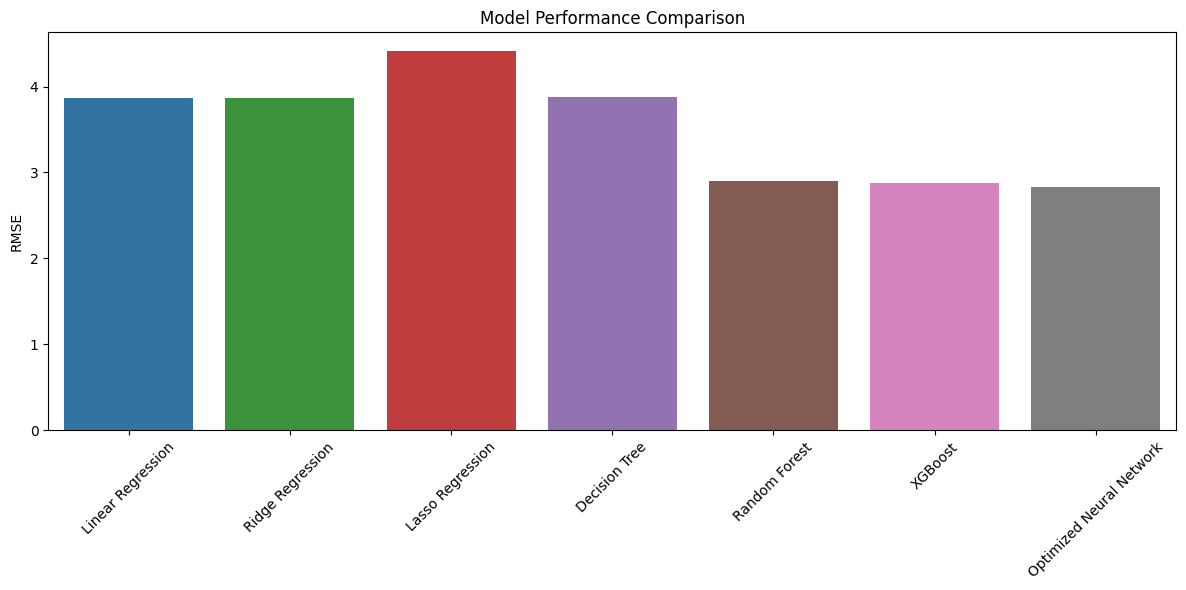

In [28]:
# Train models and compare performance
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective ='reg:squarederror'),
    "Optimized Neural Network": MLPRegressor(
        hidden_layer_sizes=best_hidden_layer_sizes,
        activation=best_activation,
        alpha=best_alpha,
        learning_rate_init=best_learning_rate_init,
        max_iter=500,
        early_stopping=True,
        random_state=42
    )
}

rmse_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[name] = rmse

# Define a custom color palette
custom_palette = ["#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

# Visualize the results with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=list(rmse_results.keys()), y=list(rmse_results.values()), palette=custom_palette)
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Search the runs for the experiment's results
experiment_results = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_tr,metrics.rmse_xgb,metrics.rmse_fr,metrics.rmse_nn,metrics.rmse_lr,metrics.rmse_lsr,metrics.rmse_rr,params.max_depth,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.log-model.history
0,09ef428f696a4d1a82df96c5fc29816f,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/09ef...,2023-10-27 18:25:36.138000+00:00,2023-10-27 18:26:05.058000+00:00,3.807963,2.87649,2.893355,2.83308,3.866773,4.409817,3.866564,20,run_4,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""09ef428f696a4d1a82df96c5fc29816f""..."
1,3ad83f85ff9443018d2148c74e89a103,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/3ad8...,2023-10-27 18:25:09.378000+00:00,2023-10-27 18:25:36.134000+00:00,3.068346,2.87649,2.814782,2.83308,3.866773,4.409817,3.866564,10,run_3,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""3ad83f85ff9443018d2148c74e89a103""..."
2,44a9a8ef161243249a311c567b0d7878,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/44a9...,2023-10-27 18:24:43.198000+00:00,2023-10-27 18:25:09.367000+00:00,3.027733,2.87649,2.967462,2.83308,3.866773,4.409817,3.866564,5,run_2,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""44a9a8ef161243249a311c567b0d7878""..."
3,2c5a9fb638e244bc96e4934b43260410,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/2c5a...,2023-10-27 18:24:20.362000+00:00,2023-10-27 18:24:43.193000+00:00,3.917318,2.87649,3.832143,2.83308,3.866773,4.409817,3.866564,2,run_1,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""2c5a9fb638e244bc96e4934b43260410""..."
4,da1386eb0bac4ceab2bcf223c5a015dc,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/da13...,2023-10-27 18:23:49.580000+00:00,2023-10-27 18:24:20.358000+00:00,4.752035,2.87649,4.694655,2.83308,3.866773,4.409817,3.866564,1,run_0,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""da1386eb0bac4ceab2bcf223c5a015dc""..."
5,9c136ccb68c54525adff56005ae84f40,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/9c13...,2023-10-26 23:49:22.565000+00:00,2023-10-26 23:49:49.264000+00:00,3.807963,2.87649,2.893355,2.83308,3.866773,4.409817,3.866564,20,run_4,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""9c136ccb68c54525adff56005ae84f40""..."
6,da3950116bcb45578e9f25245ef63590,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/da39...,2023-10-26 23:48:56.560000+00:00,2023-10-26 23:49:22.561000+00:00,3.068346,2.87649,2.814782,2.83308,3.866773,4.409817,3.866564,10,run_3,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""da3950116bcb45578e9f25245ef63590""..."
7,bb4308a4083c4ffaaedfd6477581a839,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/bb43...,2023-10-26 23:48:33.843000+00:00,2023-10-26 23:48:56.555000+00:00,3.027733,2.87649,2.967462,2.83308,3.866773,4.409817,3.866564,5,run_2,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""bb4308a4083c4ffaaedfd6477581a839""..."
8,2795fbbfb54c411486a23e1d9991f13d,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/2795...,2023-10-26 23:48:11.823000+00:00,2023-10-26 23:48:33.835000+00:00,3.917318,2.87649,3.832143,2.83308,3.866773,4.409817,3.866564,2,run_1,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""2795fbbfb54c411486a23e1d9991f13d""..."
9,251a711286604787941e57561fa33372,247129405521597742,FINISHED,file:///content/mlruns/247129405521597742/251a...,2023-10-26 23:47:47.025000+00:00,2023-10-26 23:48:11.819000+00:00,4.752035,2.87649,4.694655,2.83308,3.866773,4.409817,3.866564,1,run_0,/usr/local/lib/python3.10/dist-packages/colab_...,LOCAL,root,"[{""run_id"": ""251a711286604787941e57561fa33372""..."


## Conclusion

From our analysis, the results indicate that the Neural Network, when fine-tuned with Bayesian Optimization, is a formidable contender in predictive modeling. It achieved the lowest RMSE of approximately 2.83308. Such an outcome exemplifies the potential of neural networks to discern patterns and relationships, even when confronted with datasets that are inherently volatile, such as weather data. The performance of the neural network across runs further also demonstrates the effectiveness of the Bayesian Optimization technique.

However, traditional algorithms should not be sidelined. The XGBoost (XGB) model, a stalwart in the realm of machine learning, produced an RMSE closely tailing the neural network, recording at about 2.87649. XGBoost's reputation for its unparalleled efficiency and precision is well-deserved, and its adeptness in regression tasks was evident in our analysis. This goes on to show that while neural networks, especially when optimized, are powerful, traditional algorithms like XGBoost can still hold their ground and deliver commendable results.

Moreover, the Random Forest (RF), a prime example of ensemble methods in machine learning, also exhibited noteworthy performance in specific runs. The sporadic variations in the Random Forest's outcomes across different runs spotlight the pivotal role of hyperparameter tuning. It becomes abundantly clear that when equipped with the right parameters, even traditionally generalized models can be meticulously calibrated to yield results that are on par with, if not surpassing, their more advanced counterparts.


